# More Model Iterations

In this notebook I tidy up my model iterations from 04_m2_lc.ipynb and make sure I do a validation split on my trainig data.

I also want to change how I dummy out my variables using one hot encoding and also look into the area code feature which is currently an `int` feature but should be categorical.

In [1]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from imblearn.oversampling import SMOTE

# variable for file path from this directory
to_data = '../../../data/'

In [9]:
# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


I've decided I actually want to have 1/0's instead of True/False for my binary columns.  

In [10]:
binary = ['voice_mail_plan', 'international_plan', 'churn']
for col in binary:
    df[col].replace((True, False), (1, 0), inplace = True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

Area code is actually going to be a category - let's checkout all the unique values:

In [8]:
df.area_code.unique()

array([415, 408, 510])

In [9]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

It's weird that there are only 3 area codes but all 51 states...

In [12]:
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Let's change area code to a category type:

In [11]:
df.area_code = df.area_code.astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   category
 3   international_plan      3333 non-null   int64   
 4   voice_mail_plan         3333 non-null   int64   
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_minutes       3333 non-null   float64 
 7   total_day_calls         3333 non-null   int64   
 8   total_day_charge        3333 non-null   float64 
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_eve_charge        3333 non-null   float64 
 12  total_night_minutes     3333 non-null   float64 
 13  total_night_calls       3333 non-null   int64   
 14  total_night_charge      

In [19]:
to_dummy = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [12]:
df.international_plan = df.international_plan.astype('str')

In [13]:
df.voice_mail_plan = df.voice_mail_plan.astype('str')

In [14]:
X_test = df.drop('churn', axis = 1)

In [15]:
X = pd.get_dummies(X_test, drop_first = True)

In [57]:
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_1,voice_mail_plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

# Modelling set up:

### Train Test Split

In [16]:
y = df.churn
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [24]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 15)

### Scale

In [25]:
ss = StandardScaler()
X_t_ss = ss.fit_transform(X_t)
X_val_ss = ss.transform(X_val)

## First Shitty Model - base tree model:

In [26]:
# Instantiate and fit a DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, random_state = 42)
dtc.fit(X_t_ss, y_t)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Recall:

In [27]:
# train and scaled
print(recall_score(y_t, dtc.predict(X_t_ss)))

0.7433962264150943


In [28]:
# validation set
print(recall_score(y_val, dtc.predict(X_val_ss)))

0.6421052631578947


#### Plot feature importance:

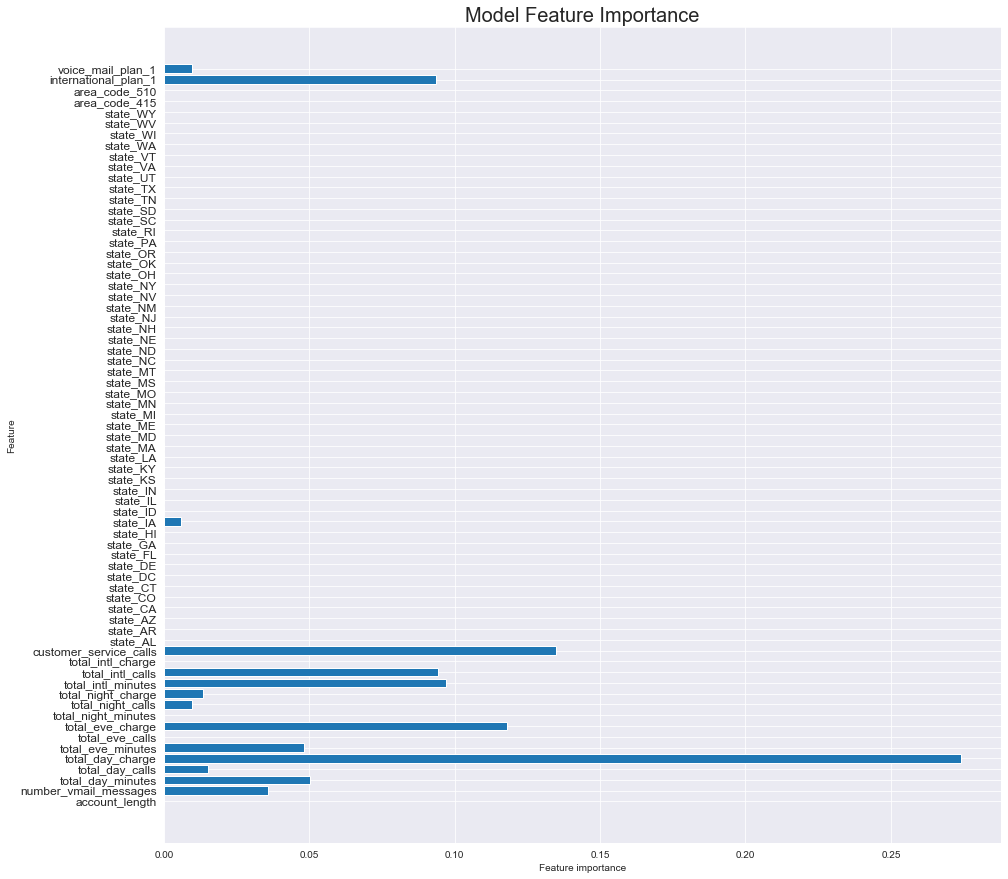

In [29]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Model Feature Importance', fontsize = 20)
    plt.savefig('feature_import_fsm.png')

plot_feature_importances(dtc)

So we can see it's being greedy towards the plan features rather than location features.

Maybe we want to test and see how the model performs if we leave out states.

## Model 2:  drop state columns from data

In [44]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [46]:
df_nostate = df.drop('state', axis = 1)

In [48]:
X_nostate = df_nostate.drop('churn', axis = 1)

In [53]:
X_nostate = pd.get_dummies(X_nostate, drop_first = True)

In [54]:
X_nostate

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,area_code_415,area_code_510,international_plan_1,voice_mail_plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,1,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,1,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,1,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,1,0


In [52]:
y_nostate = df_nostate.churn

## Set up model

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_nostate, y_nostate, test_size = 0.25, random_state = 15)

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 15)

In [59]:
ss = StandardScaler()
X_t_ss = ss.fit_transform(X_t)
X_val_ss = ss.transform(X_val)

In [60]:
# Instantiate and fit a DecisionTreeClassifier
dtc2 = DecisionTreeClassifier(max_depth=5, random_state = 42)
dtc2.fit(X_t_ss, y_t)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Recall:

In [61]:
# train and scaled
print(recall_score(y_t, dtc2.predict(X_t_ss)))

0.7433962264150943


In [62]:
# validation set
print(recall_score(y_val, dtc2.predict(X_val_ss)))

0.6421052631578947


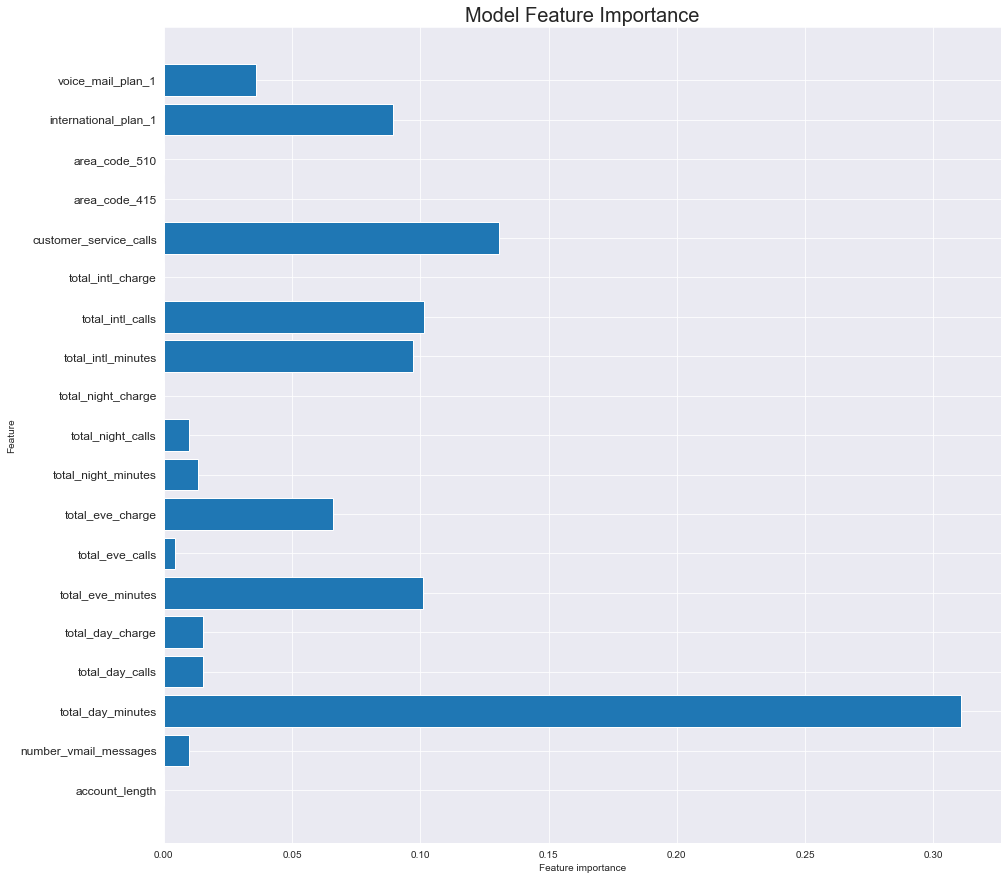

In [63]:
plot_feature_importances(dtc2)

So we get exactly the same scores.  From this point it doesn't seem necessary to leave out state or include them.  I can continue to test this on future models.

## Model 3:  Random Forest with Grid Search

Reset splits with states:

In [67]:
# splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 15)

# scale
ss = StandardScaler()
X_t_ss = ss.fit_transform(X_t)
X_val_ss = ss.transform(X_val)

In [68]:
rft = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [10, 100],
    'max_depth': [5, 10, 15, 20],
    'max_features': [5, 10, 15, 20],
    'class_weight': ["balanced", "balanced_subsample", None]
}

gs_tree = GridSearchCV(rft, param_grid, cv=3)
gs_tree.fit(X_t, y_t)

gs_tree.best_params_

{'class_weight': None,
 'max_depth': 15,
 'max_features': 20,
 'n_estimators': 100}

In [70]:
rft2 = gs_tree.best_estimator_
rft2

RandomForestClassifier(max_depth=15, max_features=20, random_state=42)

In [71]:
# train and scaled
print(recall_score(y_t, rft2.predict(X_t_ss)))

# validation set
print(recall_score(y_val, rft2.predict(X_val_ss)))

0.2943396226415094
0.28421052631578947


Terrible recall score.

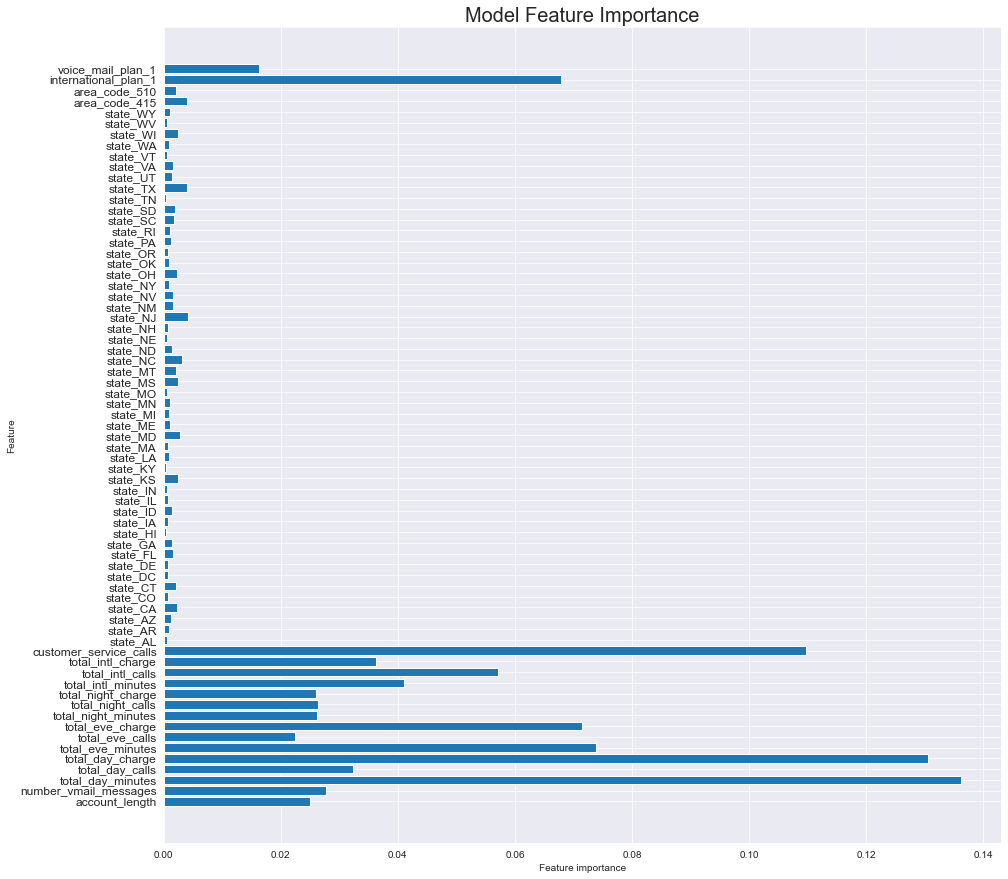

In [72]:
plot_feature_importances(rft2)

So state does seem to have some importance here.

## Model 4:  Vanilla Gradient Boost

In [76]:
gbc = GradientBoostingClassifier(random_state = 15)
gbc

GradientBoostingClassifier(random_state=15)

In [77]:
gbc.fit(X_t_ss, y_t)

GradientBoostingClassifier(random_state=15)

### Recall

In [78]:
# train and scaled
print(recall_score(y_t, gbc.predict(X_t_ss)))

# validation set
print(recall_score(y_val, gbc.predict(X_val_ss)))

0.8339622641509434
0.6631578947368421


### Cross Val Scores

In [79]:
# train
print(cross_val_score(gbc, X_t_ss, y_t, cv=5, scoring='recall'))

# test
print(cross_val_score(gbc, X_val_ss, y_val, cv=5, scoring='recall'))

[0.71698113 0.60377358 0.66037736 0.79245283 0.66037736]
[0.52631579 0.63157895 0.52631579 0.57894737 0.78947368]


In [80]:
y_score = gbc.fit(X_t_ss, y_t).decision_function(X_val_ss)

fpr, tpr, thresholds = roc_curve(y_val, y_score)

print(f'AUC: {auc(fpr, tpr)}')

AUC: 0.9348957298907646


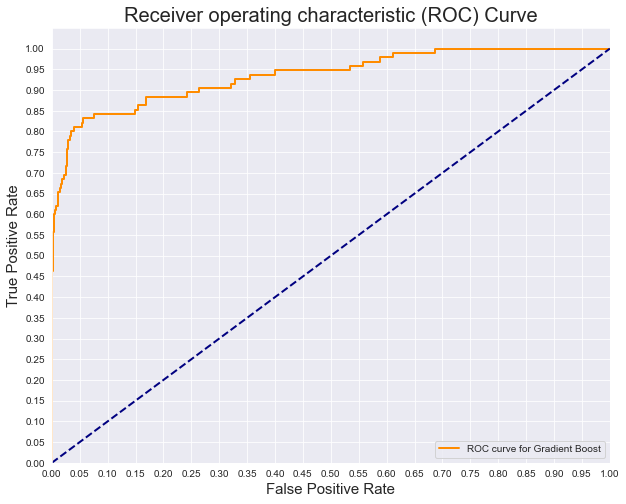

In [81]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for Gradient Boost')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic (ROC) Curve', fontsize = 20)
plt.legend(loc='lower right')
plt.show()

So not fantastic recall scores but high AUC score...  Let's tune it a bit

In [1]:
from sklearn.model_selection import KFold

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "/opt/anaconda3/envs/mod3-env/bin/python"
  * The NumPy version is: "1.18.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/opt/anaconda3/envs/mod3-env/lib/python3.7/site-packages/numpy/core/_multiarray_umath.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libopenblas.dylib
  Referenced from: /opt/anaconda3/envs/mod3-env/lib/python3.7/site-packages/numpy/core/_multiarray_umath.cpython-37m-darwin.so
  Reason: image not found


In [2]:
from imblearn.over_sampling import SMOTE

In [5]:
kf = KFold(n_splits = 5, random_state = 42)

In [21]:
val_recall = []
for train_ind, val_ind in kf.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    ss = StandardScaler()
    X_t_ss = ss.fit_transform(X_t)
    X_val_ss = ss.transform(X_val)
    
    smote = SMOTE()
    X_t_resampled, y_t_resampled = smote.fit_resample(X_t_ss, y_t)
    
    gb = GradientBoostingClassifier(random_state = 42)
    gb.fit(X_t_resampled, y_t_resampled)
    
    val_recall.append(recall_score(y_val, gb.predict(X_val_ss)))
    
val_recall

[0.7142857142857143,
 0.7901234567901234,
 0.7638888888888888,
 0.7692307692307693,
 0.6388888888888888]

In [22]:
np.mean(val_recall)

0.735283543616877

In [105]:
! conda list

# packages in environment at /opt/anaconda3/envs/mod3-env:
#
# Name                    Version                   Build  Channel
appnope                   0.1.0                    py37_0  
attrs                     19.3.0                     py_0  
backcall                  0.2.0                      py_0  
blas                      1.0                         mkl  
bzip2                     1.0.8                h1de35cc_0  
ca-certificates           2020.6.24                     0  
cairo                     1.14.12              hc4e6be7_4  
certifi                   2020.6.20                py37_0  
click                     7.1.2                      py_0  
click-plugins             1.1.1                      py_0  
cligj                     0.5.0                    py37_0  
curl                      7.67.0               ha441bb4_0  
cycler                    0.10.0                   py37_0  
decorator                 4.4.2                      py_0  
descartes                 1.1.0 

In [ ]:
! 

### Model 5:  Tuning Gradient Boost with Grid Search

In [84]:
gbc2 = GradientBoostingClassifier(max_features = 10, random_state = 15)
param_grid2 = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 10, 15],
    'criterion': ['friedman_mse', 'mse', 'mae']
}


#     'learning_rate': [0.1, 0.5, 1]
#     'max_features': [5, 10, 15]

gs_gbc = GridSearchCV(gbc2, param_grid2, cv=3)
gs_gbc.fit(X_t_ss, y_t)

gs_gbc.best_params_

KeyboardInterrupt: 

In [92]:
def model(model):
    model.fit(X_t_ss, y_t)

    #recall
    # train and scaled
    
    print(recall_score(y_t, model.predict(X_t_ss)))

    # validation set
    print(recall_score(y_val, model.predict(X_val_ss)))

    #cross val
    # train
    print(cross_val_score(model, X_t_ss, y_t, cv=5, scoring='recall'))

    # test
    print(cross_val_score(model, X_val_ss, y_val, cv=5, scoring='recall'))

    #AUC
    y_score = model.fit(X_t_ss, y_t).decision_function(X_val_ss)

    fpr, tpr, thresholds = roc_curve(y_val, y_score)

    print(f'AUC: {auc(fpr, tpr)}')

In [86]:
gbc2 = GradientBoostingClassifier(max_features = 10, n_estimators = 1000, learning_rate = 0.5, 
                                  max_depth = 10, random_state = 15)
gbc2

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=10,
                           n_estimators=1000, random_state=15)

In [87]:
model(gbc2)

1.0
0.11578947368421053
[0.05660377 0.0754717  0.0754717  0.09433962 0.03773585]
[0.         0.         0.         0.         0.05263158]
AUC: 0.876961271102284
